In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pairtrader import *


In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(248925, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['btt'][-60*24*2:]
Y = close['trx'][-60*24*2:]

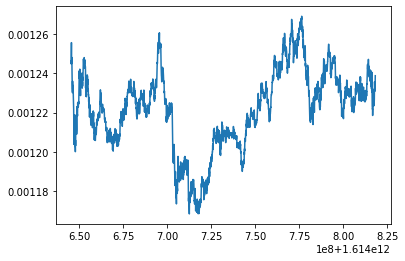

In [4]:
plt.plot(X)

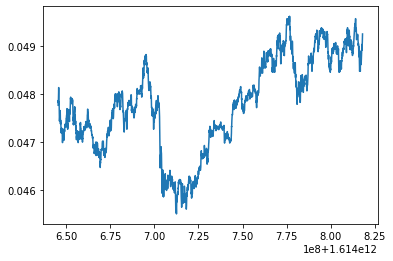

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2.5
z_sl = 1
z_tp = 1
window = 60 # 60 mins
trade_size = 10000
trainval_split = len(X)//2
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

In [10]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
print('Logs:', logs)
longs = [i[0] for i in logs if i[1] == 'L']
shorts = [i[0] for i in logs if i[1] == 'S']
stop_loss = [i[0] for i in logs if i[1] == 'SL']
take_profit = [i[0] for i in logs if i[1] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 12783.688248302526
Asset Balance: 0
Total Balance: 12783.688248302526
Open Positions: {}
Logs: [(1440, 'S'), (1443, 'TP'), (1573, 'L'), (1577, 'TP'), (1610, 'S'), (1611, 'SL'), (1612, 'S'), (1623, 'TP'), (1723, 'S'), (1729, 'TP'), (1855, 'S'), (1856, 'SL'), (1857, 'S'), (1865, 'TP'), (1920, 'L'), (1925, 'TP'), (1931, 'L'), (1934, 'TP'), (2004, 'L'), (2007, 'SL'), (2008, 'L'), (2029, 'TP'), (2266, 'S'), (2275, 'TP'), (2314, 'L'), (2322, 'TP'), (2365, 'S'), (2370, 'TP'), (2501, 'S'), (2514, 'TP'), (2655, 'L'), (2660, 'TP'), (2748, 'S'), (2751, 'TP'), (2823, 'L'), (2827, 'TP'), (2837, 'L'), (2838, 'TP'), (2847, 'L'), (2848, 'TP')]
Losses: 3
Profits: 17


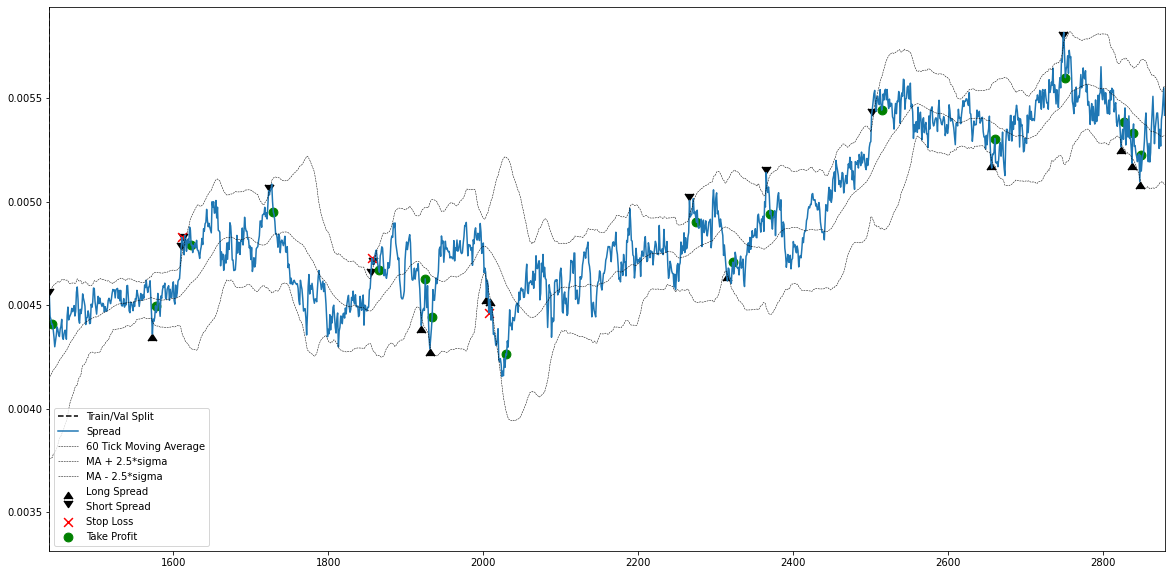

In [11]:
spread_plot = pt.plot('spread', zoom=True)

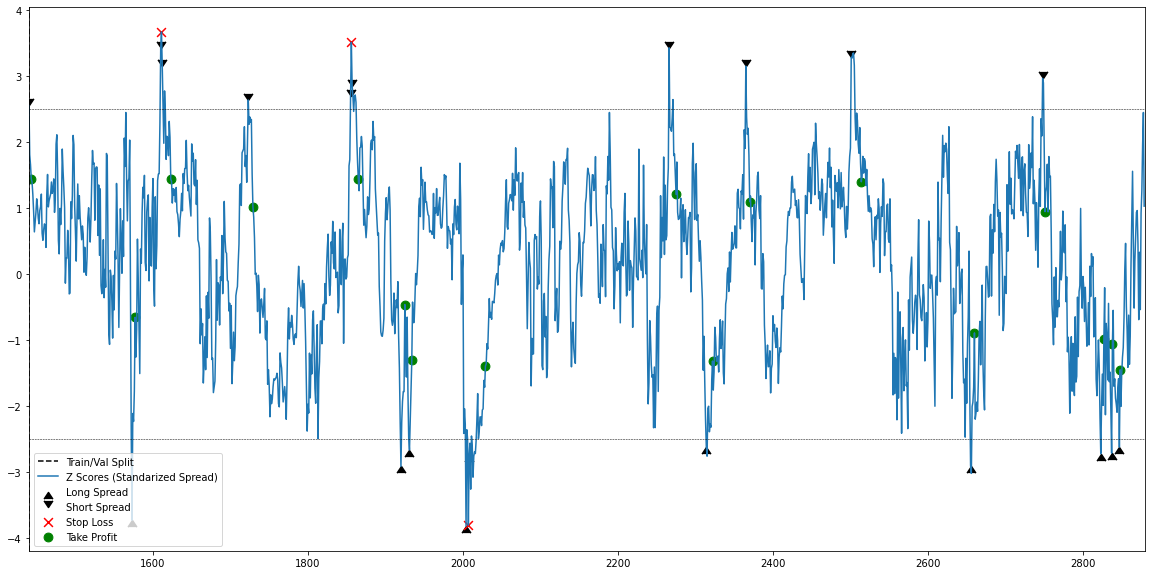

In [12]:
z_plot = pt.plot('z', zoom=True)